

# Project: Investigate a Dataset - [100k medical appointments in Brazil]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.


### Question(s) for Analysis

>Questions to answer by analysing the data set:

1- who has the highiest probability to attend in the spicified appointment date ?  
2- does handicapabiliy degree affects the attentance percentage ?  
3- Does alcoholism or gender influences whether  the patient attend or not ?  
4- Did sending sms affect the attendence ?  
5- what is percentrage of attendence?   
6- is there any aspect that contributes sharply to not attending ?  
7- what is the top 10 nighbourhoods with the lowest attendence ?  
8- that is age category with the most attendence and the one with the lowest ?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

<a id='wrangling'></a>
## Data Wrangling



### General Properties
> Most of the date set contains categorical data rather than numerical one.  
> It will be easier to switch the logical 1,0 values into more understandable yes- no values.  
> The 'no-show' column better be adjusted to a clearer format.
> There are date time columns should be rendered date_time formate
> Time in the appointment column is always '00: 00: 00' so there is no use of it.

#### Loading the csv file containing the data set.

In [2]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Gathering some information about the data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum().sum() #finding Null values.

0

In [5]:
df.duplicated().sum() #finding duplicated values.

0

In [6]:
df.shape

(110527, 14)

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data cleaning and adjustment to render it more fit to the analysis.

#### 1- removing unnessary columns for clarity. 

In [8]:
df= df.drop('PatientId', axis=1)

#### 2- Turning all the columns names into lower case.

In [9]:
df= df.rename(lambda x: x.lower(), axis=1)

In [10]:
df

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### 3- Turning the 0, 1 value columns into a caregorical no, yes values. 

In [11]:
df.nunique()

appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

In [12]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
replace= {0: 'no', 1: 'yes'}
cols= ['scholarship','hipertension','diabetes','alcoholism','sms_received']
df[cols]= df[cols].replace(replace)

In [14]:
df.head(3)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,yes,no,no,0,no,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,no,no,no,0,no,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,no,no,no,no,0,no,No


#### 4- Turning the no-show column name into a more logical name and altering the values.

In [15]:
df.rename({'no-show': 'show'}, axis =1, inplace = True)
replace1={'No': 'yes', 'Yes':'no'}
df.show= df.show.replace(replace1)
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes


#### 5- Changing the hipertension column name into correct word 'hypertension'.

In [16]:
df.rename({"hipertension": "hypertension"}, axis=1, inplace= True)
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes


#### 6- converting the date time columns into a date time objects.

In [17]:
list_= ['scheduledday','appointmentday']
for col in list_:
    df[col] = df[col].str.replace(' ', '')
#a loop to remove all spaces from the string values in date columns.

In [18]:
for col in list_:
    df[col]= pd.to_datetime(df[col], format = '%Y-%m-%dT%H:%M:%SZ')

In [19]:
print(df[list_].dtypes)

scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
dtype: object


In [20]:
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes


In [21]:
df['scheduledday']= pd.to_datetime(df['scheduledday'].dt.date) #removing the time since the appointmentday has no time.

In [22]:
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes


#### 7- Defining a new column calculating the gap between the schedule day and appointment day

In [23]:
df['gap'] = df['appointmentday'] - df['scheduledday']
df.head(3)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,gap
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes,0 days
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,no,no,no,0,no,yes,0 days
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,no,no,no,no,0,no,yes,0 days


In [24]:
# rearranging columns
colss= df.columns.tolist()
colss = colss[0:4] + colss[-1:] + colss[4:-1]
df= df[colss]

In [25]:
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,gap,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29,2016-04-29,0 days,62,JARDIM DA PENHA,no,yes,no,no,0,no,yes


In [26]:
#turning the column into int to allow calculations.
df.gap= df.gap.astype(str).apply(lambda x: x[:-len(' days')]).astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

### 1- who has the highiest probability to attend in the spicified appointment date ?

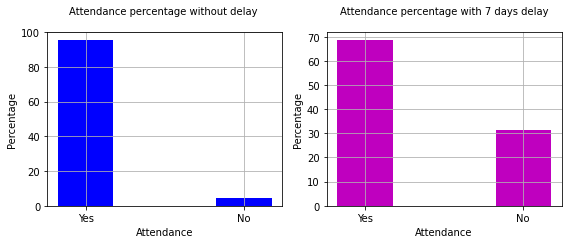

In [27]:
fig1= plt.figure(figsize=(8,3.5))
ax1= fig1.add_subplot(121)
ax2= fig1.add_subplot(122)

df0= (df[df.gap== 0].groupby('show')['appointmentid'].count()/df[df.gap== 0].appointmentid.count()*100)
ind =np.arange(len(df0))
width = 0.35
ax1.bar(ind, df0.sort_values(ascending=False), width, color='b');
labels = ['Yes', 'No']
locations= ind
ax1.xaxis.set_ticks(locations)
ax1.xaxis.set_ticklabels(labels)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Attendance')
ax1.set_title('Attendance percentage without delay \n', fontsize=10)
ax1.grid(True)

df7plus= (df[df.gap >= 7].groupby('show')['appointmentid'].count()/df[df.gap >= 7].appointmentid.count()*100)
ind =np.arange(len(df7plus))
width = 0.35
ax2.bar(ind, df7plus.sort_values(ascending=False), width, color='m');
labels = ['Yes', 'No']  # xtick labels
locations= ind
ax2.xaxis.set_ticks(locations)
ax2.xaxis.set_ticklabels(labels)
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Attendance')
ax2.set_title('Attendance percentage with 7 days delay\n', fontsize=10)
ax2.grid(True)

fig1.tight_layout()

we found if the appointment date between 7 days has highest probability to attend

### 2- does handicapabiliy degree affects the attentance percentage ?

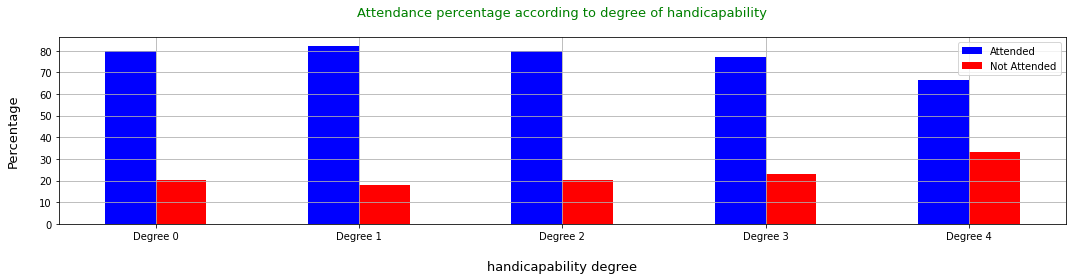

In [28]:
fig2 =plt.figure(figsize=(15,4))
ax3= fig2.add_subplot(111)
xx= df.groupby(['show','handcap'])['appointmentid'].count()
yy= df.groupby('handcap')['appointmentid'].count()
attended= (xx['yes']/yy)*100
notattended= (xx['no']/yy)*100
ind= np.arange(len(attended))
width=0.25
ax3.bar(ind, attended, width, label='Attended', color='b')
ax3.bar(ind+width, notattended, width, label='Not Attended', color='r')
labels= ['Degree 0','Degree 1', 'Degree 2', 'Degree 3', 'Degree 4']
location= ind+width/2
ax3.xaxis.set_ticks(location)
ax3.xaxis.set_ticklabels(labels)
ax3.legend()
ax3.set_ylabel('Percentage\n', fontsize=13)
ax3.set_xlabel('\nhandicapability degree', fontsize=13)
ax3.set_title('Attendance percentage according to degree of handicapability\n' , fontsize=13, color='g');
ax3.grid(True)
fig2.tight_layout()

we notics that all handicapability degree have same average of attend but degree 4 about half of people didn't come

### 3- Does alcoholism or gender influences whether  the patient attend or not ?

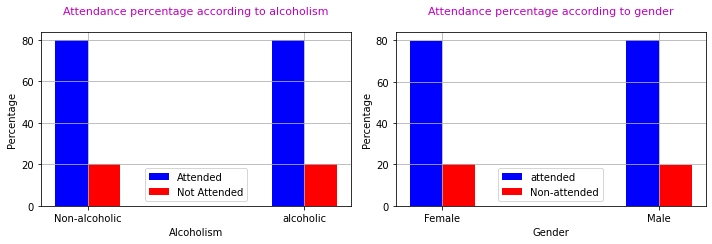

In [29]:
fig3= plt.figure(figsize=(10,3.5))


ax2 =fig3.add_subplot(121)
ax3 =fig3.add_subplot(122)


xxx= df.groupby(['show','alcoholism'])['appointmentid'].count()
yyy= df.groupby('alcoholism')['appointmentid'].count()
attended1 = xxx['yes']/yyy *100
notattened1= xxx['no']/yyy *100
ind= np.arange(len(attended1))
width=0.15
ax2.bar(ind, attended1, width, label='Attended', color='b')
ax2.bar(ind+width, notattened1, width, label='Not Attended', color='r')
labels= ['Non-alcoholic','alcoholic']
location= ind+width/2
ax2.xaxis.set_ticks(location)
ax2.xaxis.set_ticklabels(labels)
ax2.legend()
ax2.set_ylabel('Percentage', fontsize=10)
ax2.set_xlabel('Alcoholism', fontsize=10)
ax2.set_title('Attendance percentage according to alcoholism\n' , fontsize=11, color='m');
ax2.grid(True)


a= df.groupby(['show', 'gender'])['appointmentid'].count()
b= df.groupby('gender')['appointmentid'].count()
attended2= a['yes']/b*100
nonattended2 = a['no']/b*100
ind=np.arange(len(attended2))
ax3.bar(ind, attended2, width, label='attended', color = 'b')
ax3.bar(ind+width, nonattended2, width, label='Non-attended', color='r')
labels= ['Female','Male']
location= ind+width/2
ax3.xaxis.set_ticks(location)
ax3.xaxis.set_ticklabels(labels)
ax3.legend()
ax3.set_ylabel('Percentage', fontsize=10)
ax3.set_xlabel('Gender', fontsize=10)
ax3.set_title('Attendance percentage according to gender\n' , fontsize=11, color='m');
ax3.grid(True)
fig3.tight_layout()

part one of question we found that alchohol didn't effect in attendance

part two we found that femal more than male in attendance

### 4- Did sending sms affect the attendence ?

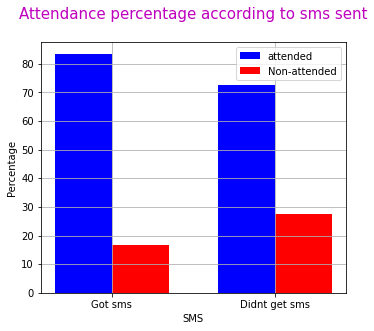

In [30]:
fig4= plt.figure(figsize=(5,4.7))
ax1 =fig4.add_subplot(111)

c= df.groupby(['show', 'sms_received'])['appointmentid'].count()
d= df.groupby('sms_received')['appointmentid'].count()
attended3= c['yes']/d*100
nonattended3 = c['no']/d*100
ind=np.arange(len(attended3))
c= df.groupby(['show', 'sms_received'])['appointmentid'].count()
d= df.groupby('sms_received')['appointmentid'].count()
attended3= c['yes']/d*100
nonattended3 = c['no']/d*100
ind=np.arange(len(attended3))
width=0.35
ax1.bar(ind, attended3, width, label='attended', color = 'b')
ax1.bar(ind+width, nonattended3, width, label='Non-attended', color='r')
labels= ['Got sms','Didnt get sms']
location= ind+width/2
ax1.xaxis.set_ticks(location)
ax1.xaxis.set_ticklabels(labels)
ax1.legend()
ax1.set_ylabel('Percentage', fontsize=10)
ax1.set_xlabel('SMS', fontsize=10)
ax1.set_title('Attendance percentage according to sms sent\n' , fontsize=15, color='m');
ax1.grid(True)
fig4.tight_layout()

we found about 10% of people who attend with sms massage more than who didn't get the sms massage

### 5- what is percentrage of the overall attendence ?

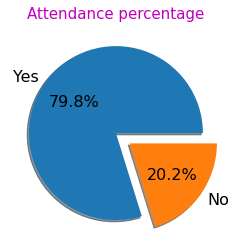

In [31]:
explode=[0,0.2]
fig5 = plt.figure()
ax1= fig5.add_subplot(111)
ax1.pie(df.show.value_counts(), labels =['Yes', 'No'], autopct='%1.1f%%', shadow=True, explode=explode, textprops={'fontsize': 16});
ax1.set_title('Attendance percentage' , fontsize=15, color='m');

about 80% of people attend and 20% not

In [32]:
df_no = df[df.show =='no'] # defining a new dataframe with only who did not attend to dig more into details.

In [33]:
df_no.head(1)

,appointmentid,gender,scheduledday,appointmentday,gap,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
6,5630279,F,2016-04-27,2016-04-29,2,23,GOIABEIRAS,no,no,no,no,0,no,no


### 6- is there any aspect that contributes sharply to not attending?

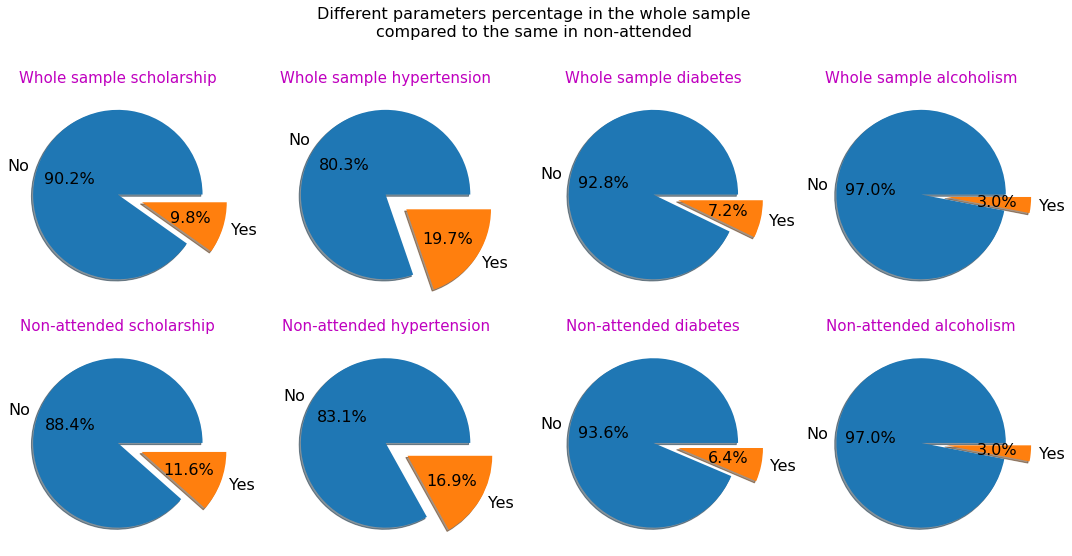

In [34]:
fig6=plt.figure(figsize=(15,8))
fig6.suptitle('Different parameters percentage in the whole sample\ncompared to the same in non-attended\n', fontsize=16)
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8= fig6.add_subplot(241),fig6.add_subplot(242),fig6.add_subplot(243),fig6.add_subplot(244), fig6.add_subplot(245),fig6.add_subplot(246),fig6.add_subplot(247),fig6.add_subplot(248)
explode=[0,0.3]
ax1.pie(df.scholarship.value_counts()/df.appointmentid.count(),textprops={'fontsize': 16}, autopct='%1.1f%%', labels =['No', 'Yes'], shadow=True, explode=explode);
ax2.pie(df.hypertension.value_counts()/df.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax3.pie(df.diabetes.value_counts()/df.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax4.pie(df.alcoholism.value_counts()/df.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax1.set_title('Whole sample scholarship', fontsize=15, color='m')
ax2.set_title('Whole sample hypertension', fontsize=15, color='m')
ax3.set_title('Whole sample diabetes', fontsize=15, color='m')
ax4.set_title('Whole sample alcoholism', fontsize=15, color='m');
ax5.pie(df_no.scholarship.value_counts()/df_no.appointmentid.count(),textprops={'fontsize': 16}, autopct='%1.1f%%', labels =['No', 'Yes'], shadow=True, explode=explode);
ax6.pie(df_no.hypertension.value_counts()/df_no.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax7.pie(df_no.diabetes.value_counts()/df_no.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax8.pie(df_no.alcoholism.value_counts()/df_no.appointmentid.count(), labels =['No', 'Yes'],textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, explode=explode);
ax5.set_title('Non-attended scholarship', fontsize=15, color='m')
ax6.set_title('Non-attended hypertension', fontsize=15, color='m')
ax7.set_title('Non-attended diabetes', fontsize=15, color='m')
ax8.set_title('Non-attended alcoholism', fontsize=15, color='m');
fig6.tight_layout()

we found that all of this [scholarship, hypertension, diabetes, alcoholism] didn't have high effect of attendence

### 7- what is the top 10 nighbourhoods with the lowest attendence ?

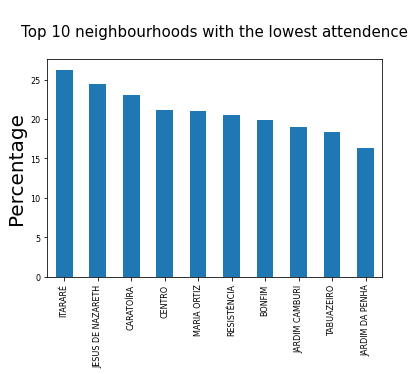

In [35]:
(df_no.neighbourhood.value_counts().nlargest(10)/df.neighbourhood.value_counts()*100).sort_values(ascending=False).dropna().plot(kind='bar', fontsize=8);
plt.ylabel('Percentage', fontsize=20)
plt.title('\nTop 10 neighbourhoods with the lowest attendence\n', fontsize=15);

In [36]:
df[df.age>100].shape # finding the number of patients with age more than 100, looks like it could be conseidered outliers. 

(7, 14)

### 8- that is age category with the most attendence and the one with the lowest ?

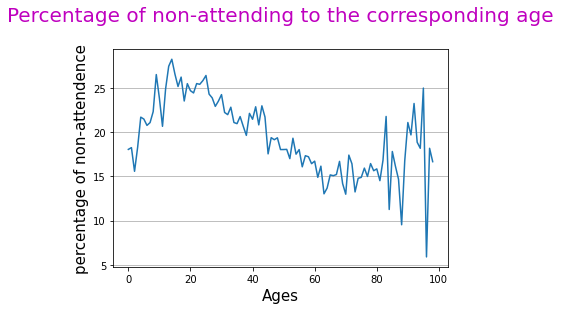

In [37]:
df_no120,df_120 = df_no[df_no.age<=100],df[df.age<=100]
ff= pd.DataFrame(df_no120.groupby('age')['appointmentid'].count()/df_120.groupby('age')['appointmentid'].count()*100).reset_index().dropna()
plt.plot(ff.age,ff.appointmentid)
plt.title('Percentage of non-attending to the corresponding age\n',fontsize=20, color='m')
plt.xlabel('Ages',fontsize=15, color='black')
plt.ylabel('percentage of non-attendence',fontsize=15, color='black');
plt.grid(axis='y')

between  10 to 20 have high percentage of no attendence

<a id='conclusions'></a>
## Conclusion

## result

#### - The data shown that the patients that scheduled their appointment day on the same day of the call had a very high probability to attend as shown the the graph that more than 95% of them attended, while decreased to less than 70 % if the patient delayed the appointment from 1 to 7 days after the call.  
#### - Neither the alcoholism or the gender or the degree of haicapability seem to have a big influence on the attendence, only the 4th degree handicapability degree had less than 70 % attendence while the other degrees are around 80 % attendence percentage.    
#### - While other factors doesnt have an big influence, but sending sms seems to have a considerable one as the patients who received sms as a reminder of the appointment achieved more than 80 % attendence percentage, while the patients who did not get sms, achieved only slightly over the 70 %.  
#### - It was also noticed that scolarship, alcoholism, diabetes, and hypertension percentage of patients in the whole sample resembles their percentage in the drawn not-attended sample to a high extent, which is a fair proof that these parameters does not provide reliable information whether to expect the patient or not.
#### - Graph also shown that patients whos hospital was localed in the neighbourhood ITARARE had the highiest non attendence probability with more than 25 %, perharps the hospital in this neighbourhood should be investigated.   


## limitation
    1. there's data won't help us in analysis like pateintId and appointmentId